# COVID19 Detection using Chest X-rays (Pneumonia classification)

---

In [ ]:
import tensorflow as tf
tf.__version__
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 32.77 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
import os
main_dir = '/content/datasets/Data'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])
test_covid_names =os.listdir(test_covid_dir)
print(test_covid_names[:10])
test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(45).jpg', 'COVID19(213).jpg', 'COVID19(53).jpg', 'COVID19(290).jpg', 'COVID19(519).jpg', 'COVID19(429).jpg', 'COVID19(280).jpg', 'COVID19(357).jpg', 'COVID-19 (4).jpg', 'COVID19(452).jpg']
['NORMAL(866).jpg', 'NORMAL(100).jpg', 'NORMAL(1521).jpg', 'NORMAL(575).jpg', 'NORMAL(371).jpg', 'NORMAL(946).jpg', 'NORMAL(559).jpg', 'NORMAL(666).jpg', 'NORMAL(1149).jpg', 'NORMAL(630).jpg']
['COVID-19 (865).jpg', 'COVID19(385).jpg', 'COVID19(573).jpg', 'COVID-19 (817).jpg', 'COVID-19 (831).jpg', 'COVID-19 (713).jpg', 'COVID-19 (731).jpg', 'COVID19(13).jpg', 'COVID19(269).jpg', 'COVID-19 (876).jpg']
['NORMAL(1327).jpg', 'NORMAL(355).jpg', 'NORMAL(678).jpg', 'NORMAL(1370).jpg', 'NORMAL(970).jpg', 'NORMAL(1195).jpg', 'NORMAL(234).jpg', 'NORMAL(709).jpg', 'NORMAL(938).jpg', 'NORMAL(1523).jpg']


In [ ]:
print("Number of train dataset images:",len(train_covid_names+train_normal_names))

print("Number of test dataset covid images:",len(test_covid_names+test_normal_names))

Number of train dataset images: 1811
Number of test dataset covid images: 484


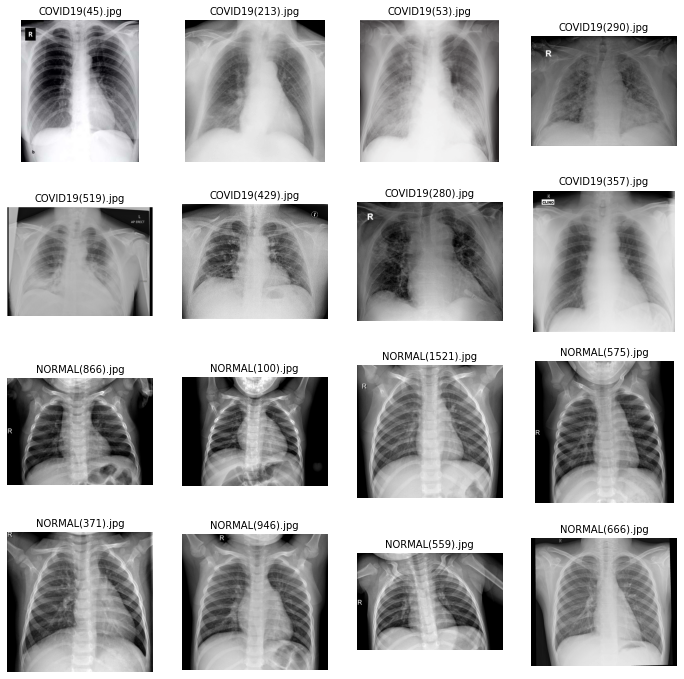

In [ ]:
import matplotlib.image as mpimg
rows=4
cols=4
fig = plt.gcf()
fig.set_size_inches(12,12)

covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

merged_list = covid_pic+normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img, cmap='gray')

plt.show()

In [ ]:
dgen_train = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255,
                                                             validation_split=0.2,
                                                             zoom_range = 0.2,
                                                             horizontal_flip=True)

dgen_validation = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
dgen_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)


train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset='training',
                                                 batch_size=32,
                                                 class_mode= 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size=(150,150),
                                                      subset='validation',
                                                      batch_size=32,
                                                      class_mode= 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode= 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Conv2D(64,(5,5),padding='SAME',activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256,activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 82s 1s/step - loss: 1.3411 - accuracy: 0.7170 - val_loss: 0.4244 - val_accuracy: 0.7072
Epoch 2/30
46/46 [==============================] - 52s 1s/step - loss: 0.2763 - accuracy: 0.8854 - val_loss: 0.2401 - val_accuracy: 0.9392
Epoch 3/30
46/46 [==============================] - 52s 1s/step - loss: 0.2281 - accuracy: 0.9158 - val_loss: 0.2173 - val_accuracy: 0.9420
Epoch 4/30
46/46 [==============================] - 52s 1s/step - loss: 0.2011 - accuracy: 0.9372 - val_loss: 0.1646 - val_accuracy: 0.9503
Epoch 5/30
46/46 [==============================] - 52s 1s/step - loss: 0.1718 - accuracy: 0.9448 - val_loss: 0.4393 - val_accuracy: 0.9199
Epoch 6/30
46/46 [==============================] - 52s 1s/step - loss: 0.1544 - accuracy: 0.9455 - val_loss: 0.2055 - val_accuracy: 0.9558
Epoch 7/30
46/46 [==============================] - 52s 1s/step - loss: 0.1428 - accuracy: 0.9476 - val_loss: 0.1351 - val_accuracy: 0.9669
Epoch 8/30
46/46 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

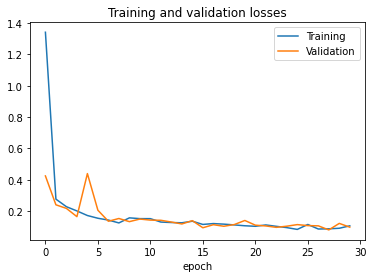

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

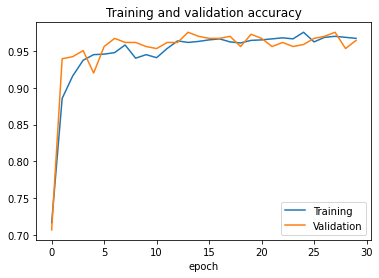

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate (test_generator)

print('test acc :{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 12s 730ms/step - loss: 0.1313 - accuracy: 0.9504
test acc :0.9504132270812988 test loss:0.13132990896701813


In [ ]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = tf.keras.preprocessing.image.load_img(img_path,target_size=(150,150))
  images = tf.keras.utils.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('COVID19')
  else:
    print('Normal')

Saving covid1.jpg to covid1 (1).jpg
Saving covid2.jpeg to covid2 (1).jpeg
Saving normal1.jpg to normal1 (1).jpg
Saving normal2.jpg to normal2 (1).jpg
covid1.jpg
COVID19
covid2.jpeg
COVID19
normal1.jpg
Normal
normal2.jpg
Normal


Correct predictions on custom data

-----